# Problem 1.1
## Plot (draw) a network 

In [1]:
from IPython.display import Image
img ="s2.png"
Image(url=img)

# Problem 1.2

\begin{equation*}
a_{1j}=x_{1}w_{11j}+x_{2}w_{12j}+b_{1j} \space ; \space where \space j \space \in \left [ 1,2,3 \right ] \\\
h_{1j}=max(0,a_{1j}) \space ; \space where \space j \space \in \left [ 1,2,3 \right ] \\\
a_{2i}=h_{11}w_{21i}+h_{12}w_{22i}+h_{13}w_{22i}+b_{2i} \space ; \space where \space i \space \in \left [ 1,2 \right ] \\\
h_{2i}=max(0,a_{2i}) \space ; \space where \space i \space \in \left [ 1,2 \right ] \\\
a_{3k}=w_{31k}h_{21}+w_{32k}h_{22}+b_{3k} \space ; \space where \space k \space \in \left [ 1,2 \right ] \\\
y_{k}=softmax(a_{3k}) \space ; \space where \space k \space \in \left [ 1,2 \right ] \\\
\end{equation*}


# Problem 1.3

In [5]:
from numpy import random

# --- Setting up ReLu activation ---
# --- Setting up Softmax ---
#softmax = lambda z: z/np.sum(z, axis = 1, keepdims=True)

random.seed(19930416)
softmax = lambda z: np.exp(z)/(np.exp(z).sum(axis=1, keepdims=True))
relu = np.vectorize(lambda z: np.fmax(0,z))

# --- Setting up the feedforwardfunction ---
def ff_nn_2_ReLu(X, W1,W2,V,b1,b2,c):
    a1=X.dot(W1)+b1
    h1=relu(a1)
    a2=h1.dot(W2)+b2
    h2=relu(a2)
    a3=h2.dot(V)+c
    y=softmax(a3)
    return y

# Problem 1.4

In [6]:
## x = np.array([[1,0,0],[0,1,1]])
# --- the following set of weight matrices and inputs ---
W1=np.array([[1,-1,0],[0,0,0.5]])
W2=np.array([[1,-1],[0,-1],[0,0]])
V=np.array([[1,0,-1],[1,0,-1]])
X=np.array([[1,-1],[0,-1],[0,1]])
b1=np.array([0,0,1])
b2=np.array([1,-1])
c=np.array([1,0,0])



what are the class probabilities associated with the forward pass of each
sample?

In [7]:
nn2=ff_nn_2_ReLu(X=X,W1=W1,W2=W2,V=V,b1=b1,b2=b2,c=c)

print(nn2[0:2,:])


[[ 0.94649912  0.04712342  0.00637746]
 [ 0.84379473  0.1141952   0.04201007]]


# Problem 2.1

What are the partial derivatives of f with respect to x and to y?

Rosenbrock Function:

\begin{equation*}
f(x,y)=(1-x)^2 + 100 \ast (y-x^2)^2
\end{equation*}

partial derivatives of f with respect to x

\begin{equation*}
\frac{\partial f(x,y)}{\partial x}=2(200x^3-200xy+x-1)
\end{equation*}

partial derivatives of f with respect to y

\begin{equation*}
\frac{\partial f(x,y)}{\partial y}=200(y-x^2)
\end{equation*}

# Problem 2.2

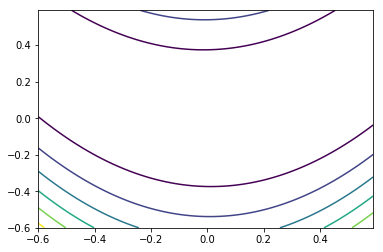

In [8]:
# --- Rosenbrock function ---
delta = 0.01
x = np.arange(-0.6,0.6, delta)
y = np.arange(-0.6,0.6, delta)
X,Y=np.meshgrid(x,y)
Z=(1-X)**2 + 100*(Y-X**2)**2
fig,ax=plt.subplots()
CS=ax.contour(X,Y,Z)

# Problem 2.3

## Gradient Descent algorithm

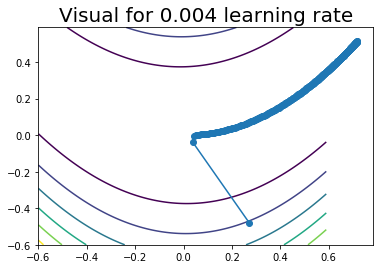

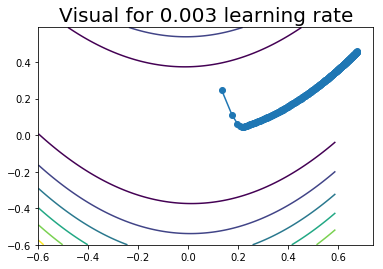

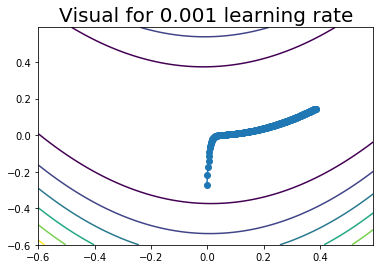

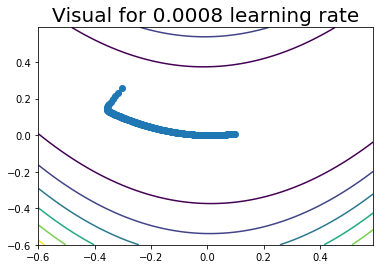

In [42]:
## ------- Create the gradient function --------
import numpy as np
def grad_f(vector):
    x, y = vector
    df_x=2*(200*x**3-200*x*y+x-1) 
    df_y=200*(y-x**2)
    return np.array([df_x, df_y])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-0.5,0.5,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)
np.random.seed(10)
traj = grad_descent(iterations=300,learning_rate=0.004 )

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
figure_title="Visual for 0.004 learning rate"
plt.title(figure_title, fontsize = 20)
plt.plot(x,y,'-o')

traj = grad_descent(iterations=300,learning_rate=0.003 )

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
figure_title="Visual for 0.003 learning rate"
plt.title(figure_title, fontsize = 20)
plt.plot(x,y,'-o')

traj = grad_descent(iterations=300,learning_rate=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
figure_title="Visual for 0.001 learning rate"
plt.title(figure_title, fontsize = 20)
plt.plot(x,y,'-o')

traj = grad_descent(iterations=300,learning_rate=0.0008)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
figure_title="Visual for 0.0008 learning rate"
plt.title(figure_title, fontsize = 20)
plt.plot(x,y,'-o')

# Problem 2.4

#  Gradient Descent With Momentum algorithm

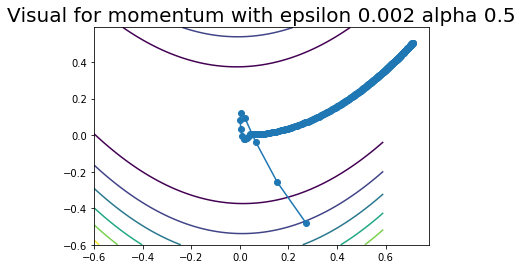

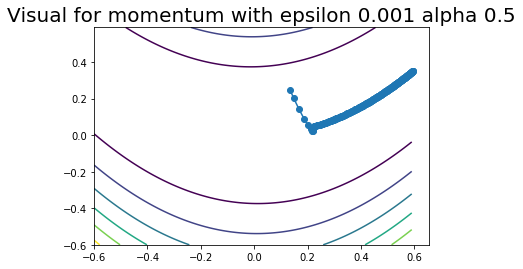

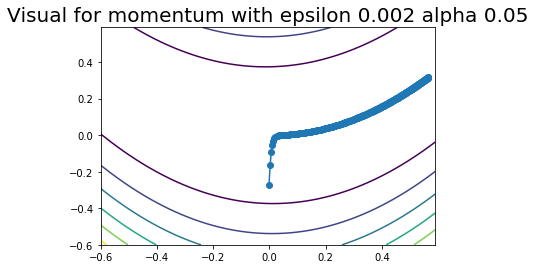

In [46]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-0.5,0.5,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

np.random.seed(10)
traj = grad_descent_with_momentum(iterations=300, epsilon=0.002, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
figure_title="Visual for momentum with epsilon 0.002 alpha 0.5"
plt.title(figure_title, fontsize = 20)
plt.plot(x,y,'-o')


traj = grad_descent_with_momentum(iterations=300, epsilon=0.001, alpha=.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
figure_title="Visual for momentum with epsilon 0.001 alpha 0.5"
plt.title(figure_title, fontsize = 20)
plt.plot(x,y,'-o')

traj = grad_descent_with_momentum(iterations=300, epsilon=0.002, alpha=.05)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
figure_title="Visual for momentum with epsilon 0.002 alpha 0.05"
plt.title(figure_title, fontsize = 20)
plt.plot(x,y,'-o')

# Problem 3.1

In [2]:

img ="s3.png"
Image(url=img)

# Problem 3.2

In [57]:
##------------ define matrix to conver the weights to vectors and matrix------
def To_vector(w_1, w_2, v, b_1, b_2, c):
    w1_11, w1_12, w1_21, w1_22, w1_31, w1_32 = w_1[0,0], w_1[0,1], w_1[1,0], w_1[1,1], w_1[2,0], w_1[2,1]
    b1_1, b1_2, b1_3 = np.squeeze(b_1[0]), np.squeeze(b_1[1]), np.squeeze(b_1[2]) 
    w2_11, w2_12, w2_13, w2_21, w2_22, w2_23 = w_2[0,0], w_2[0,1], w_2[0,2], w_2[1,0], w_2[1,1], w_2[1,2]
    b2_1, b2_2 = np.squeeze(b_2[0]), np.squeeze(b_2[1])
    v_11, v_12, v_21, v_22, v_31, v_32 = v[0,0], v[0,1], v[1,0], v[1,1], v[2,0], v[2,1]
    c_1, c_2, c_3 = np.squeeze(c[0]), np.squeeze(c[1]), np.squeeze(c[2])
    return np.array([w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, b1_1, b1_2, b1_3, w2_11, w2_12, w2_13, w2_21, w2_22, w2_23
                     ,b2_1, b2_2, v_11, v_12, v_21, v_22, v_31, v_32, c_1, c_2, c_3])
def To_matrix(param_vec):
    w1_11, w1_12, w1_21, w1_22, w1_31, w1_32, b1_1, b1_2, b1_3, \
    w2_11, w2_12, w2_13, w2_21, w2_22, w2_23, b2_1, b2_2, \
    v_11, v_12, v_21, v_22, v_31, v_32, c_1, c_2, c_3 = param_vec
    w_1 = np.array([[w1_11, w1_12],[w1_21, w1_22], [w1_31, w1_32]])
    b_1 = np.array([[b1_1],[b1_2],[b1_3]])
    w_2 = np.array([[w2_11, w2_12, w2_13], [w2_21, w2_22, w2_23]])
    b_2 = np.array([[b2_1], [b2_2]])
    v = np.array([[v_11, v_12],[v_21, v_22], [v_31, v_32]])
    c = np.array([[c_1], [c_2], [c_3]])
    return ((w_1, w_2, v, b_1, b_2, c))

In [58]:


def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()/len(y)

def ReLu(x):
    return np.maximum(x,0)

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=0))[np.newaxis,:]

def ff_nn_2_ReLu(x, w_1, w_2, v, b_1, b_2, c):
    z_1 = np.dot(w_1, x) + b_1
    h_1 = ReLu(z_1)
    z_2 = np.dot(w_2, h_1) + b_2
    h_2 = ReLu(z_2)
    z_3 = np.dot(v, h_2) + c
    return softmax(z_3)
def grad_f(weight_vector, x, y):
    x = x.T # x (2,n)
    w_1, w_2, v, b_1, b_2, c = To_matrix(weight_vector) 
    z_1 = np.dot(w_1, x) + b_1 #(3,n)
    h_1 = ReLu(z_1) #(3,n)
    z_2 = np.dot(w_2, h_1) + b_2 #(2,n)
    h_2 = ReLu(z_2) #(2,n)
    z_3 = np.dot(v, h_2) + c #(3,n)
    y_hat = softmax(z_3).T #(n, 3)
    
    dv = h_2.dot((y_hat-y)).T
    dc = (y_hat-y).sum(axis = 0).reshape(3,1)
    dw2 = (((y_hat-y).dot(v)).T * (h_2 > 0)).dot(h_1.T)
    db2 = (((y_hat - y).dot(v)).T * (h_2 > 0)).sum(axis=1).reshape(2,1)
    dw1 = ((w_2.T.dot(  (((y_hat-y).dot(v)).T * (h_2 > 0))  )) * (h_1 > 0)).dot(x.T)
    db1 = ((w_2.T.dot(  (((y_hat-y).dot(v)).T * (h_2 > 0))  )) * (h_1 > 0)).sum(axis = 1).reshape(3,1)
    
    derivitive_vector = To_vector(dw1, dw2, dv, db1, db2, dc)    
    return np.array(derivitive_vector)


# Problem 3.3

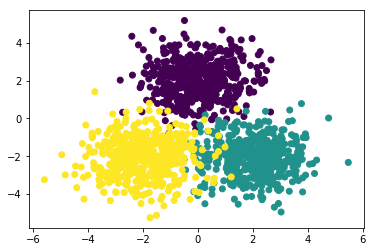

In [59]:
x = np.concatenate(
    (np.random.multivariate_normal(mean=[0,2],cov=[[1,0],[0,1]],size = 500),
    np.random.multivariate_normal(mean=[2,-2],cov=[[1,0],[0,1]],size = 500),
    np.random.multivariate_normal(mean=[-2,-2],cov=[[1,0],[0,1]],size = 500)))
class_ = np.zeros(1500)
class_[:500] = 0
class_[500:1000] = 1
class_[1000:] = 2

y = np.array([1,0,0]*500 + [0,1,0]*500 + [0,0,1]*500).reshape(1500,3)
plt.scatter(x[:,0], x[:,1], c=class_)
plt.show()
plt.close()


# Problem 3.4

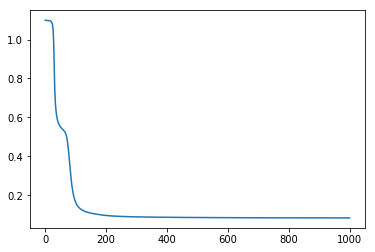

In [64]:
def grad_descent(x, y, iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=26)
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x.T, *To_matrix(point)).T)]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x.T, *To_matrix(point)).T))
    return (np.array(trajectory), losses)
traj, losses = grad_descent(x, y, iterations=1000,learning_rate=0.0005)
plt.plot(losses)
plt.show()

# Problem 3.5

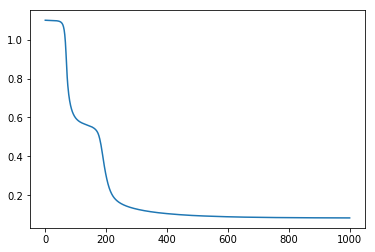

In [73]:
def grad_descent_with_momentum(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=1e-4):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=26)
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x.T, *To_matrix(point)).T)]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x.T, *To_matrix(point)).T))
    return (np.array(trajectory), losses)

traj, losses = grad_descent_with_momentum(x, y, iterations=1000,alpha=.5, epsilon = 0.0001)
plt.plot(losses)
plt.show()
plt.close()